**1. Download the data from the above link. How many ".csv" files are available in the dataset?**

In [2]:
import os

dataset_folder_path = 'C:\\Users\\neera\\Downloads\\movie_data'

all_files = os.listdir(dataset_folder_path)

csv_files = [file for file in all_files if file.endswith('.csv')]
num_csv_files = len(csv_files)

print(f"Number of '.csv' files in the dataset: {num_csv_files}")
print(csv_files)


Number of '.csv' files in the dataset: 4
['links.csv', 'movies.csv', 'ratings.csv', 'tags.csv']


In [20]:
import pandas as pd

dataset_folder_path = 'C:\\Users\\neera\\Downloads\\movie_data\\'

movies_df = pd.read_csv(dataset_folder_path + 'movies.csv')
ratings_df = pd.read_csv(dataset_folder_path + 'ratings.csv')
tags_df = pd.read_csv(dataset_folder_path + 'tags.csv')
links_df = pd.read_csv(dataset_folder_path + 'links.csv')

print('MOVIES DATAFRAME\n', movies_df)
print('RATING DATAFRAME\n', ratings_df)
print('TAGS DATAFRAME\n', tags_df)
print('LINKS DATAFRAME\n', links_df)





MOVIES DATAFRAME
       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4

**2 . What is the shape of "movies.csv"?**


In [8]:


movies_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\movies.csv')  

print("Shape of 'movies.csv':", movies_df.shape)

Shape of 'movies.csv': (9742, 3)


**3. What is the shape of "ratings.csv"?**

In [9]:
ratings_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\ratings.csv')  

print("Shape of 'ratings.csv':", ratings_df.shape)

Shape of 'ratings.csv': (100836, 4)


**4. How many unique "userId" are available in "ratings.csv"?**

In [12]:

ratings_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\ratings.csv')  

#number of unique user IDs
num_unique_users = ratings_df['userId'].nunique()

print("Number of unique USERID in 'ratings.csv':", num_unique_users)

Number of unique USERID in 'ratings.csv': 610


**5. Which movie has recieved maximum number of user ratings?**

In [14]:

# grouping by uid and counting
movies_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\movies.csv')  
ratings_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\ratings.csv')  

# Merge the DataFrames
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Group by movie and count the number of ratings
movie_ratings_count = merged_df.groupby('title')['rating'].count()

max_rated_movie_title = movie_ratings_count.idxmax()

print("Movie with the maximum number of user ratings:")
print("Movie Title:", max_rated_movie_title)

Movie with the maximum number of user ratings:
Movie Title: Forrest Gump (1994)


**6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?**

In [21]:

matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]

# Filter tags for the specified movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']

print("Tags for 'The Matrix (1999)':")
print(matrix_tags.tolist())


Tags for 'The Matrix (1999)':
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


**7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?**

In [22]:
# movieid
terminator2_movie_id = movies_df[(movies_df['title'] == 'Terminator 2: Judgment Day (1991)')]['movieId'].iloc[0]

# rating
terminator2_ratings = ratings_df[ratings_df['movieId'] == terminator2_movie_id]

# avarage rting
average_rating = terminator2_ratings['rating'].mean()

print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


**8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?**

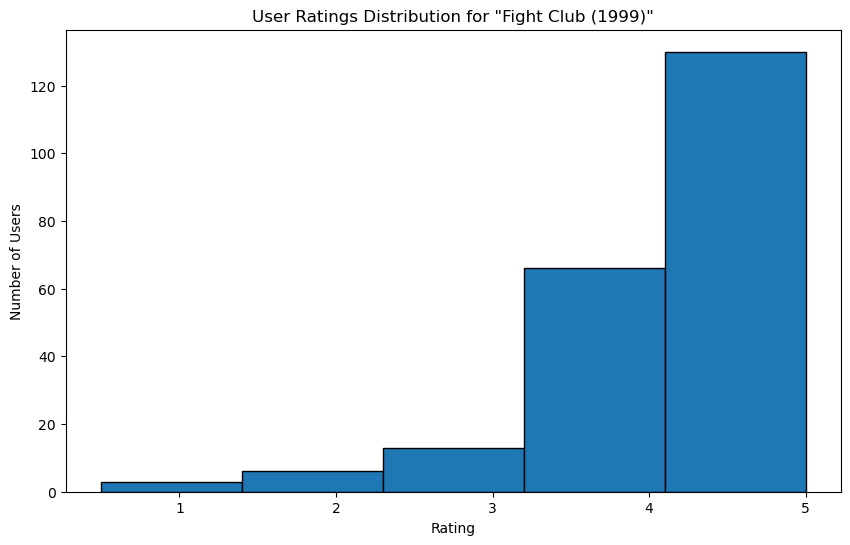

In [24]:
import matplotlib.pyplot as plt

fight_club_movie_id = movies_df[(movies_df['title'] == 'Fight Club (1999)')]['movieId'].iloc[0]

# ratings
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# plotting
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).


In [27]:
#group by movieId and apply aggregation operations
movie_ratings_stats = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

#rename columns for clarity
movie_ratings_stats.columns = ['movieId', 'rating_count', 'average_rating']

print(movie_ratings_stats.head())

   movieId  rating_count  average_rating
0        1           215        3.920930
1        2           110        3.431818
2        3            52        3.259615
3        4             7        2.357143
4        5            49        3.071429


In [33]:

#merge the two df using an inner join on 'movieId'
merged_df = pd.merge(movies_df, movie_ratings_stats, on='movieId', how='inner')

print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215        3.920930  
1                   Adventure|Children|Fantasy           110        3.431818  
2                               Comedy|Romance            52        3.259615  
3                         Comedy|Drama|Romance             7        2.357143  
4                                       Comedy            49        3.071429  


In [31]:
# filter only those movies which have more than 50 user ratings (i.e. > 50).

filtered_movies = merged_df[merged_df['rating_count'] > 50]

print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215        3.920930  
1                   Adventure|Children|Fantasy           110        3.431818  
2                               Comedy|Romance            52        3.259615  
5                        Action|Crime|Thriller           102        3.946078  
6                               Comedy|Romance            54        3.185185  


**9. Which movie is the most popular based on  average user ratings?**

In [43]:
# Sorting df by average rating in descending order
sorted_filtered_df = filtered_movies.sort_values(by='average_rating', ascending=False)

most_popular_filtered_movie = sorted_filtered_df.iloc[0]

print("Most popular movie based on average user ratings (with more than 50 ratings):")
print("Movie Title:", most_popular_filtered_movie['title'])
print("Average Rating:", most_popular_filtered_movie['average_rating'])

Most popular movie based on average user ratings (with more than 50 ratings):
Movie Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


**10. top 5 popular movies based on number of user ratings.**

In [71]:
# filtering sci-fi movies
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

# sorting by user rating
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

top_rated_5_sci_fi = sorted_sci_fi_movies.head()
print(top_rated_5_sci_fi)

third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

print("Third most popular Sci-Fi movie based on the number of user ratings with high ratings:")
print("Movie Title:", third_most_popular_sci_fi_movie['title'])
print("Average Rating:", third_most_popular_sci_fi_movie['average_rating'])
print("Number of Ratings:", third_most_popular_sci_fi_movie['rating_count'])

      movieId                                              title  \
1938     2571                                 Matrix, The (1999)   
224       260          Star Wars: Episode IV - A New Hope (1977)   
418       480                               Jurassic Park (1993)   
507       589                  Terminator 2: Judgment Day (1991)   
897      1196  Star Wars: Episode V - The Empire Strikes Back...   

                                genres  rating_count  average_rating  
1938            Action|Sci-Fi|Thriller           278        4.192446  
224            Action|Adventure|Sci-Fi           251        4.231076  
418   Action|Adventure|Sci-Fi|Thriller           238        3.750000  
507                      Action|Sci-Fi           224        3.970982  
897            Action|Adventure|Sci-Fi           211        4.215640  
Third most popular Sci-Fi movie based on the number of user ratings with high ratings:
Movie Title: Jurassic Park (1993)
Average Rating: 3.75
Number of Ratings: 238


Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. 

In [84]:

import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('div', class_='text show-more__control')
    return [review.get_text(strip=True) for review in reviews]

In [93]:
links_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\links.csv')

filtered_movies = merged_df[merged_df['rating_count'] > 50]

filtered_movies['imdb_reviews'] = links_df[links_df['movieId'].isin(filtered_movies['movieId'])]['imdbId'].apply(scrapper)

print(filtered_movies[['movieId', 'title', 'imdb_reviews']].head(10))

    movieId                                  title  \
0         1                       Toy Story (1995)   
1         2                         Jumanji (1995)   
2         3                Grumpier Old Men (1995)   
5         6                            Heat (1995)   
6         7                         Sabrina (1995)   
9        10                       GoldenEye (1995)   
10       11         American President, The (1995)   
15       16                          Casino (1995)   
16       17           Sense and Sensibility (1995)   
18       19  Ace Ventura: When Nature Calls (1995)   

                                         imdb_reviews  
0   [Andy's toys live a reasonable life of fun and...  
1   [Among the thousands of films I have viewed, t...  
2   [Sequels are rarely half as good as the origin...  
5   [Heat (1995) is a movie that is in my DVD coll...  
6   [I was surprised at how good this movie is. A ...  
9   [Brosnan has the look, the style, the intellig...  
10  [One of t

C:\Users\neera\AppData\Local\Temp\ipykernel_8936\1090871268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['imdb_reviews'] = links_df[links_df['movieId'].isin(filtered_movies['movieId'])]['imdbId'].apply(scrapper)


In [107]:
print(filtered_movies['imdb_reviews'][0])

["Andy's toys live a reasonable life of fun and peace, their only worries are birthdays and Christmases, when new toys could easily replace those already there.  One such birthday Andy's top toy, Woody the cowboy, finds himself in direct competition with Andy's new Buzz Lightyear doll.  When rivalries boil over Woody tries to hide Buzz down the side of the bed but accidentally pushes him out the window, the other tops expel Woody, and he leaves with no choice but to find Buzz and return him to the house.  But with only two days before Andy moves house, time is of the essence.Given how often the same mix of animation, wit, jokes and kids humour has been used since Toy Story (Ice Age, Monsters Inc, Bugs Life) it is easy to forget how refreshing it was when it first came out.  I have just watched it again and it is dating a little in comparison to more recent twists on the formula.  It seems each one has to be sharper and have more references etc in the background.  However it is still ve

In [133]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

def rating_scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', class_= 'sc-bde20123-1 cMEQkK')
    return imdb_rating.text if imdb_rating else np.nan

# Assuming 'links.csv' is in the same directory as your script
links_df = pd.read_csv('C:\\Users\\neera\\Downloads\\movie_data\\links.csv')

# Filter movies with more than 50 user ratings
filtered_movies_rating = merged_df[merged_df['rating_count'] > 50]

# Apply the scraper function to fetch IMDb ratings for each movie
filtered_movies_rating['imdb_ratings'] = links_df[links_df['movieId'].isin(filtered_movies_rating['movieId'])]['imdbId'].apply(rating_scrapper)

# Display the resulting DataFrame with IMDb ratings
print(filtered_movies_rating[['movieId', 'title', 'imdb_ratings']])


      movieId                             title imdb_ratings
0           1                  Toy Story (1995)          8.3
1           2                    Jumanji (1995)          7.1
2           3           Grumpier Old Men (1995)          6.6
5           6                       Heat (1995)          8.3
6           7                    Sabrina (1995)          6.3
...       ...                               ...          ...
8287   106782   Wolf of Wall Street, The (2013)          NaN
8354   109374  Grand Budapest Hotel, The (2014)          NaN
8358   109487               Interstellar (2014)          NaN
8457   112852    Guardians of the Galaxy (2014)          NaN
8673   122904                   Deadpool (2016)          NaN

[436 rows x 3 columns]


C:\Users\neera\AppData\Local\Temp\ipykernel_8936\121925495.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_rating['imdb_ratings'] = links_df[links_df['movieId'].isin(filtered_movies_rating['movieId'])]['imdbId'].apply(rating_scrapper)


highest imdb rated movie 

In [147]:
#filtered_movies_rating['imdb_ratings'] = pd.to_numeric(filtered_movies_rating['imdb_ratings'] ,errors='coerce')

max_rated_movie = filtered_movies_rating.loc[filtered_movies_rating['imdb_ratings'].idxmax()]

print("Movie with the maximum number of user ratings:")
print("Movie Title:", max_rated_movie['movieId'])
print(max_rated_movie)

Movie with the maximum number of user ratings:
Movie Title: 318
movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
imdb_ratings                                   9.3
Name: 277, dtype: object


highest imdb rated sci-fi movie

In [152]:
sci_fi_movies = filtered_movies_rating[filtered_movies_rating['genres'].str.contains('Sci-Fi', case=False, na=False)]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='imdb_ratings', ascending=False)

print(sorted_sci_fi_movies.head(1))

     movieId         title         genres  rating_count  average_rating  \
914     1214  Alien (1979)  Horror|Sci-Fi           146        3.969178   

     imdb_ratings  
914           8.7  
